In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/KL_clean_data.csv')
data=df

              Location    Price  Bathrooms  Car Parks      Size  \
0                 KLCC  1250000          3          2  1335.035   
1              Dutamas  1030000          4          2  1875.075   
2          Bukit Jalil   900000          3          2  1513.013   
3  Taman Tun Dr Ismail  5350000          5          4  7200.000   
4  Taman Tun Dr Ismail  2600000          4          4  3600.000   

         Furnishing       Type  No_of_Bedrooms  No_of_servant_rooms  \
0   Fully Furnished   Built-up               2                    1   
1  Partly Furnished   Built-up               3                    0   
2  Partly Furnished   Built-up               4                    1   
3  Partly Furnished  Land area               4                    2   
4  Partly Furnished  Land area               5                    0   

   studio_apartment Property Type Supergroup  
0                 0       Serviced Residence  
1                 0              Condominium  
2                 0          

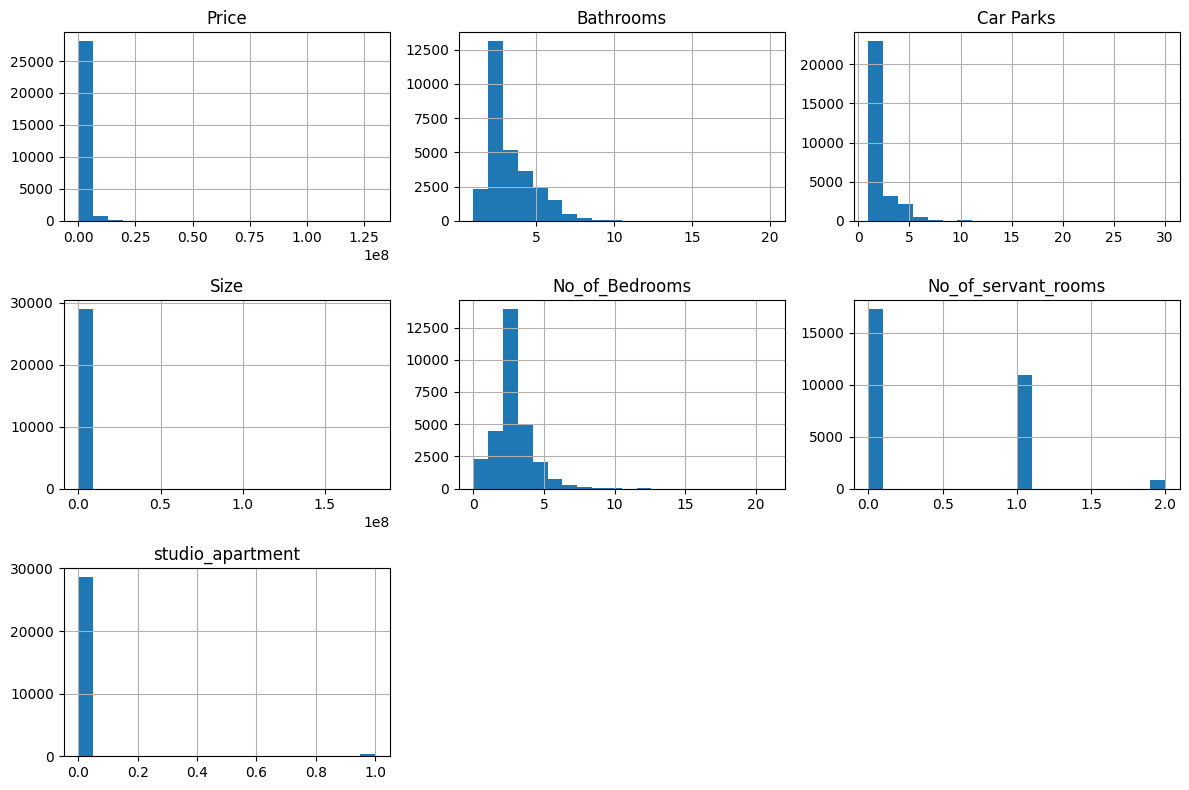

<ipython-input-10-a941452d7506>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


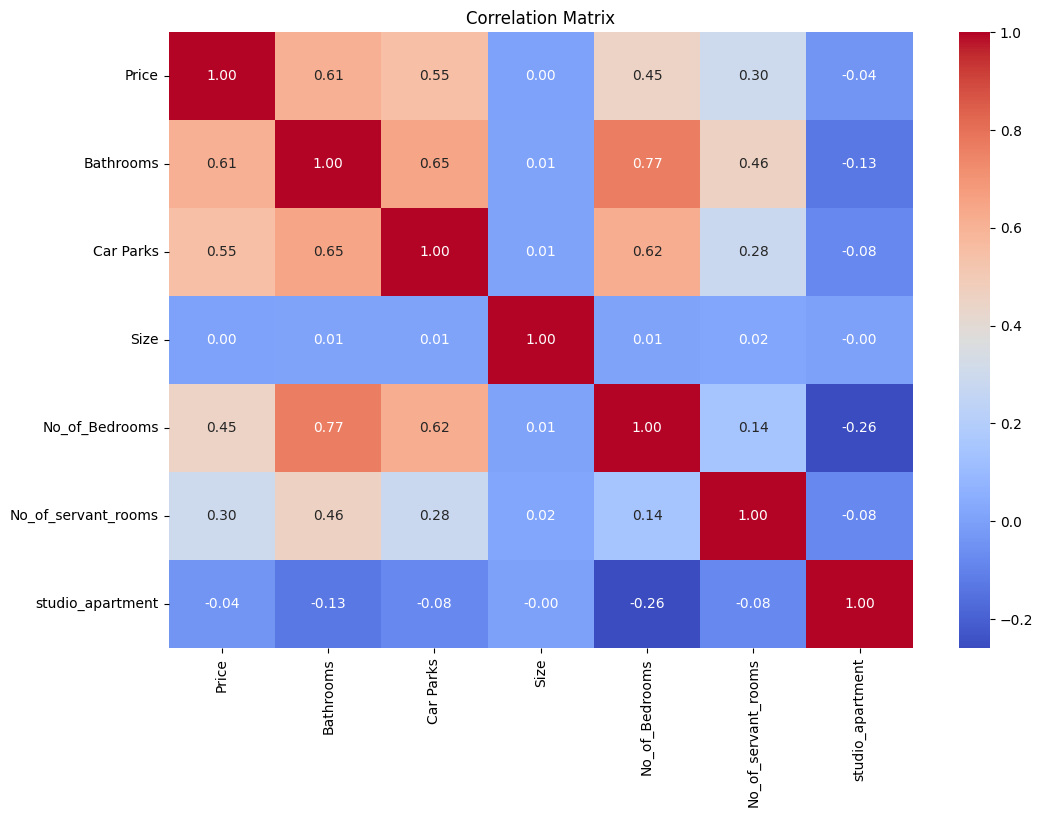

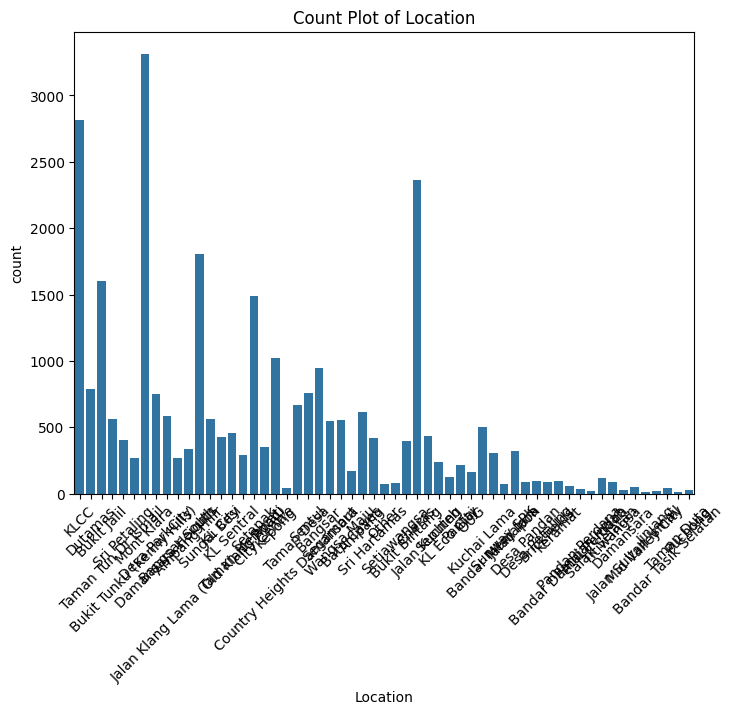

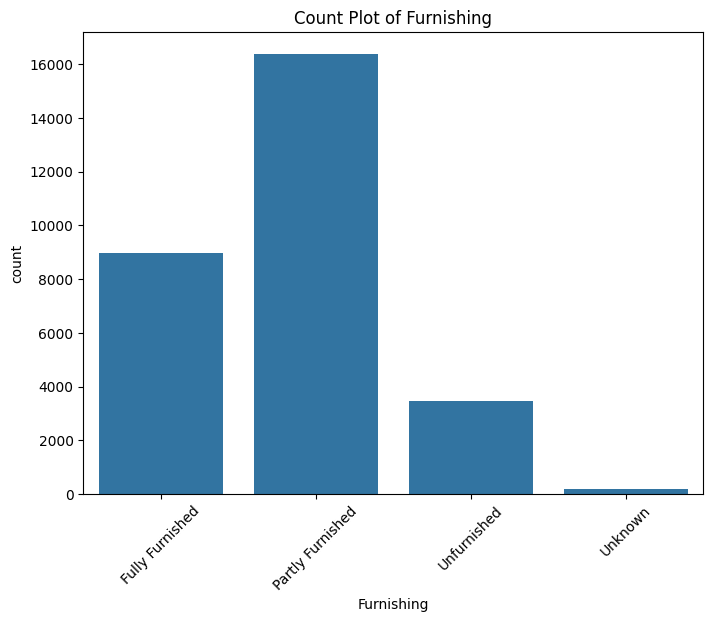

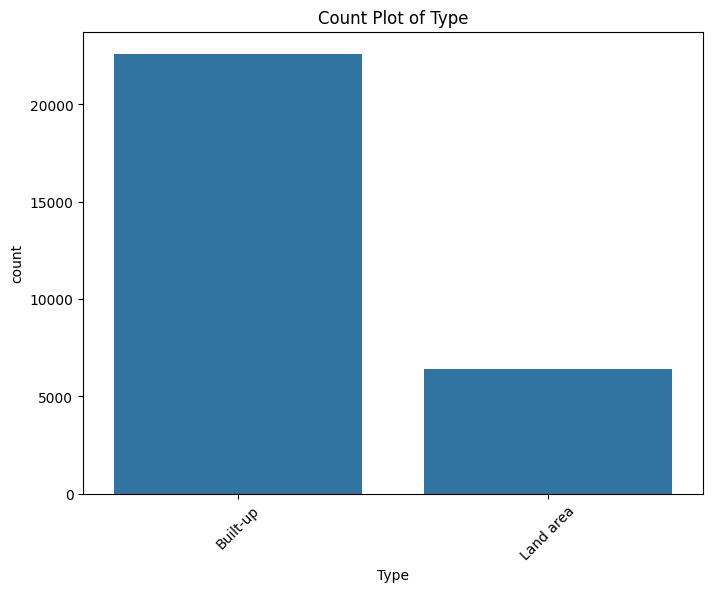

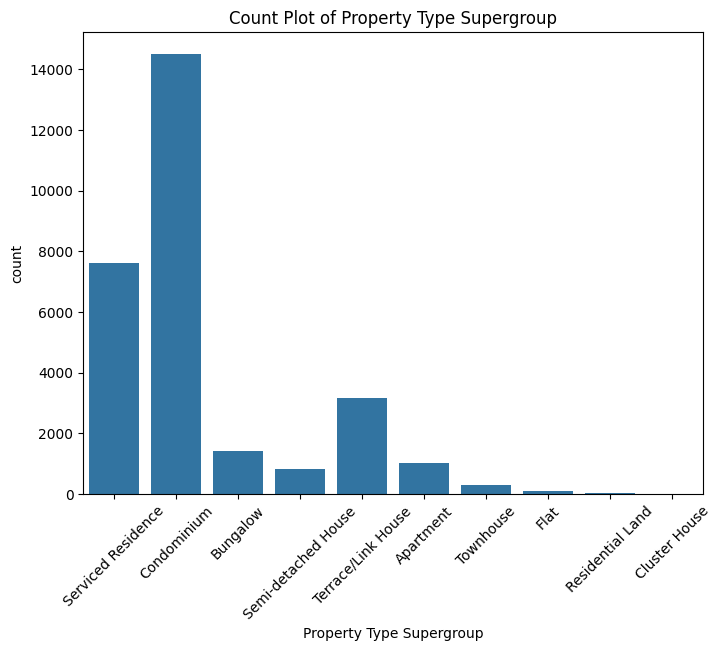

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the first few rows of the DataFrame
print(df.head())

# Check the data types of each column
print(df.dtypes)

# Compute summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot histograms for numerical features
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot count plots for categorical variables
categorical_cols = ['Location', 'Furnishing', 'Type', 'Property Type Supergroup']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [13]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores_all = df.select_dtypes(include=['int64', 'float64']).apply(stats.zscore)

# Calculate the absolute Z-scores for all numerical columns
abs_z_scores_all = z_scores_all.abs()

# Filter out rows where the absolute Z-scores are greater than 3 for any numerical column
cleaned_df = df[(abs_z_scores_all < 3).all(axis=1)]

# Optionally, you can reset the index of the cleaned DataFrame
cleaned_df.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print(cleaned_df)


                  Location    Price  Bathrooms  Car Parks      Size  \
0                     KLCC  1250000          3          2  1335.035   
1                  Dutamas  1030000          4          2  1875.075   
2              Bukit Jalil   900000          3          2  1513.013   
3      Taman Tun Dr Ismail  5350000          5          4  7200.000   
4      Taman Tun Dr Ismail  2600000          4          4  3600.000   
...                    ...      ...        ...        ...       ...   
27690              Seputeh   750000          2          1   915.015   
27691           KL Sentral  1400000          3          2  1544.044   
27692          KL Eco City   880000          1          1   650.050   
27693         Sri Hartamas  2700000          6          3  3973.073   
27694              Setapak   540000          2          3  1313.013   

             Furnishing       Type  No_of_Bedrooms  No_of_servant_rooms  \
0       Fully Furnished   Built-up               2                    1 

              Price     Bathrooms     Car Parks          Size  No_of_Bedrooms  \
count  2.769500e+04  27695.000000  27695.000000  2.769500e+04    27695.000000   
mean   1.363863e+06      2.854125      1.917061  2.041012e+03        3.067341   
std    1.294914e+06      1.334591      0.995050  2.015007e+04        1.039368   
min    3.080000e+02      1.000000      1.000000  0.000000e+00        1.000000   
25%    5.600000e+05      2.000000      1.000000  9.250250e+02        3.000000   
50%    8.809000e+05      2.000000      2.000000  1.228028e+03        3.000000   
75%    1.650000e+06      4.000000      2.000000  1.806006e+03        4.000000   
max    8.500000e+06      7.000000      6.000000  2.613600e+06        6.000000   

       No_of_servant_rooms  studio_apartment  
count         27695.000000           27695.0  
mean              0.427333               0.0  
std               0.544592               0.0  
min               0.000000               0.0  
25%               0.000000         

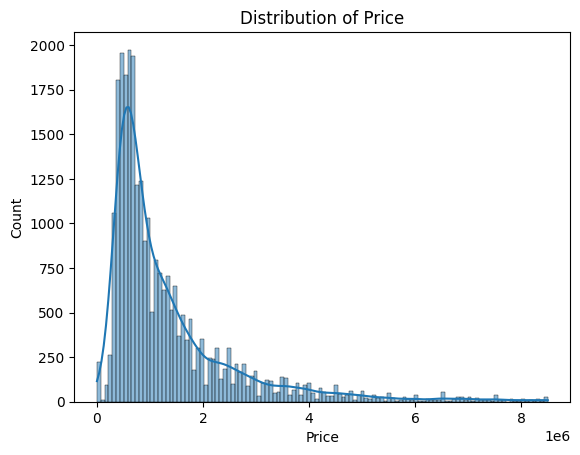

<ipython-input-14-79d580d4a4ac>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df.corr()


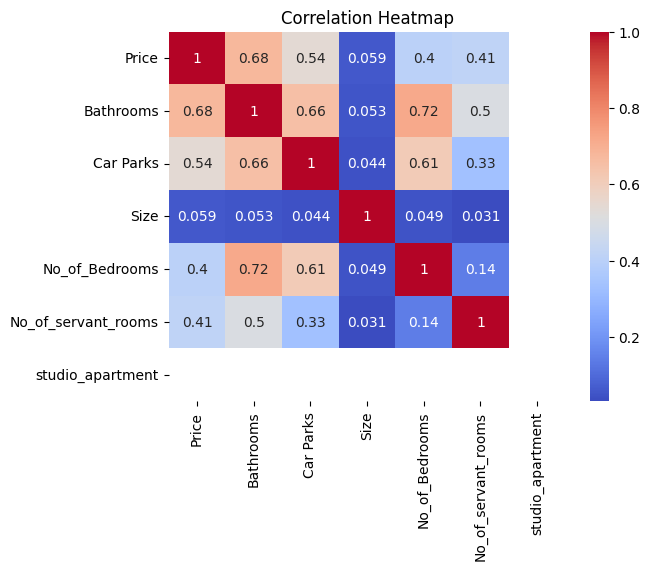

In [14]:
# Data Analysis (Exploratory Data Analysis - EDA):
#Summary statistics
print(cleaned_df.describe())

# Distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(cleaned_df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Correlation heatmap
correlation_matrix = cleaned_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Feature Engineering:
#One-hot encoding for categorical variables
cleaned_df = pd.get_dummies(cleaned_df, columns=['Furnishing', 'Type', 'Property Type Supergroup'], drop_first=True)

# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_df[['Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'No_of_servant_rooms']])
cleaned_df[['Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'No_of_servant_rooms']] = scaled_features


In [18]:
cleaned_df = pd.get_dummies(cleaned_df, columns=['Location'], drop_first=True)


In [19]:
#Model Building:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X = cleaned_df.drop('Price', axis=1)
y = cleaned_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
#Model Evaluation:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 446118571844.8535
R-squared: 0.7269719372440417


In [23]:
#Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)



Best hyperparameters: {'fit_intercept': True, 'positive': False}


In [25]:
#Cross-Validation:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')


Cross-validation scores: [0.73429467 0.71416087 0.70420855 0.72342515 0.71181073]
